# COMP615 Assignment 2

Authors: Jarrett Sanchez, Arielle Capati

**Importing all the necessary imports/libraries needed**

In [1]:
import pandas as pd #data manipulation/analysis.
import seaborn as sns #statisical graphics/visualization library (based from matplotlib) .
import matplotlib.pyplot as plt #for static/interactive/animated visualizations.
import numpy as np #numerical computations/array operations.
%matplotlib inline

#Pre-processing
from sklearn import linear_model #allows for machine learning with linear models - classification, regression, cluster & dimensionality reductioning.
import statsmodels.api as sm  #estimation of statisical models.
from scipy import stats #probability distributions and statistical functions.
from statsmodels.formula.api import ols #specify models using formula strings & DataFrames
from sklearn.preprocessing import MinMaxScaler #for preprocessing - range becomes 0-1
from sklearn.preprocessing import StandardScaler #for preprocessing class & standardizing: remove mean & scale to unit variance

#DTC
from sklearn.model_selection import train_test_split #split data into train and test sets
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc #allows retrieval of precision and recall scores
from sklearn.metrics import roc_curve, accuracy_score #retrieval of accuracy
from sklearn.model_selection import cross_val_score #cross valuation
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix #for retrieval of confusion matrix from model
import category_encoders as ce 

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#ANN
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
#Reads the Excel CSV file and displays it
coupon_df = pd.read_csv('in-vehicle-coupon-recommendation.csv')  
coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [3]:
coupon_df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
#12684 rows of data and 26 columns where (25 features and 1 'Y' target)
coupon_df.shape

(12684, 26)

In [5]:
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
coupon_df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
coupon_df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [8]:
# calculate acceptance rate
Y_counts = coupon_df.groupby('Y').Y.count()
print('Accepted coupons:',Y_counts[1],',',round(Y_counts[1]/coupon_df.shape[0]*100,3),'%')
print('Rejected coupons:',Y_counts[0],',',round(Y_counts[0]/coupon_df.shape[0]*100,3),'%')

Accepted coupons: 7210 , 56.843 %
Rejected coupons: 5474 , 43.157 %


## Data Exploration

In [9]:
#Checking for duplicated values
print('Duplicated Values:', coupon_df.duplicated().sum(),'\n')

#checking missing values in dataset
print('Missing Values: ')
print(coupon_df.isna().sum())
print('Total number of NaN: ', coupon_df.isnull().sum().sum())

Duplicated Values: 74 

Missing Values: 
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Total number of NaN:  13370


### Data Cleaning

**Handling Duplicate Values**

In [10]:
#Checking for duplicated values
print("Number of duplicates:", coupon_df.duplicated().sum())

Number of duplicates: 74


In [11]:
#Removing duplicates
coupon_df = coupon_df.drop_duplicates()
print("Number of duplicates:", coupon_df.duplicated().sum())
print(coupon_df.shape)

Number of duplicates: 0
(12610, 26)


In [12]:
#Checking for unique val
values = {'col':[],'unique':[]}

for col in coupon_df.columns:
    values['col'].append(col)
    values['unique'].append(coupon_df[col].unique())

unique_values = pd.DataFrame(values)
unique_values

,col,unique
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
6,expiration,"[1d, 2h]"
7,gender,"[Female, Male]"
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
9,maritalStatus,"[Unmarried partner, Single, Married partner, D..."


In [13]:
# Dropping features that have too many missing values (car) or have no variation (toCoupon_GEQ5min) or is redundant (direction_opp) (as seen above)
coupon_df.drop(columns=['car','direction_opp','toCoupon_GEQ5min'], inplace=True)

# Standardize class column to name of target
coupon_df = coupon_df.rename(columns={'Y':'target'})

# Show dataframe after cleaning
print(coupon_df.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

            income    Bar CoffeeHouse CarryAway RestaurantLessThan20  \
0  $37500 - $49999  never       never       NaN                  4~8   
1  $37500 - $49999  never       never       

**Handling Missing Values - Imputation**

In [14]:
#Checking for null values 
print(coupon_df.isnull().sum())
print('Total number of NaN: ', coupon_df.isnull().sum().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
target                    0
dtype: int64
Total number of NaN:  792


In [15]:
#Imputation using mode
coupon_df = coupon_df.fillna(coupon_df.mode().iloc[0])

In [16]:
#Checking the null values again
print(coupon_df.isnull().sum())
print('Total number of NaN: ', coupon_df.isnull().sum().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
target                  0
dtype: int64
Total number of NaN:  0


In [17]:
#More checking...
coupon_df.info(verbose=True)

print(coupon_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

**Illustrating features of dataset using meaningful visualtions... boxplots, histograms, etc.**

In [18]:
coupon_df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

Text(0.5, 1.0, 'Coupon Values Graph Count')

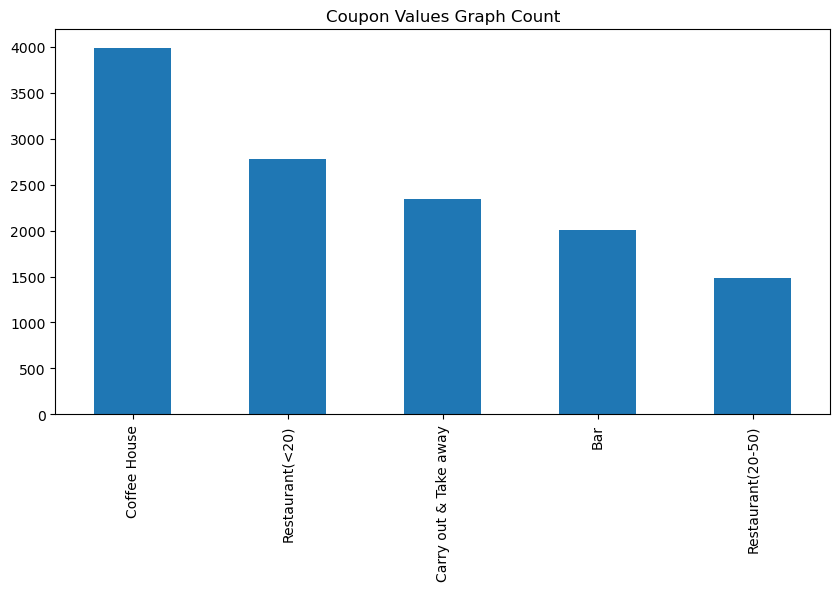

In [19]:
plt.figure(figsize=(10,5))

coupon_df.coupon.value_counts().plot(kind='bar')
plt.title('Coupon Values Graph Count')

Text(0.5, 1.0, 'Amount of Coupons used, categorized by type of coupon given')

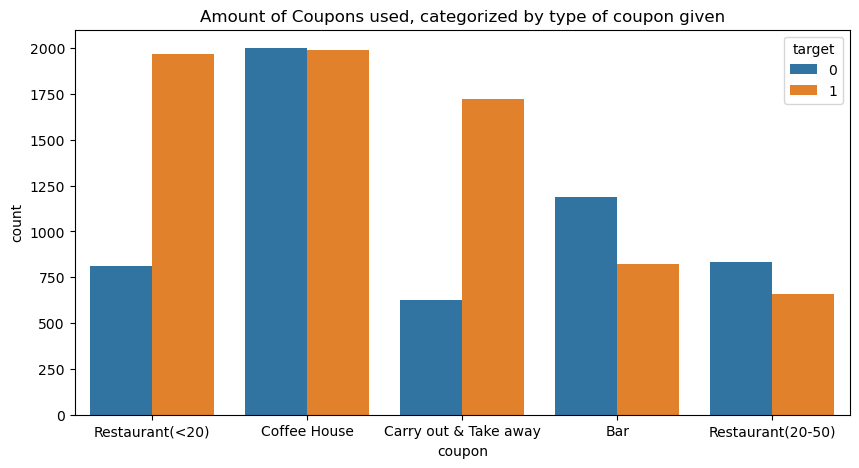

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='coupon',data=coupon_df,hue='target')
plt.title("Amount of Coupons used, categorized by type of coupon given")

In [21]:
coupon_df['expiration'].unique()

array(['1d', '2h'], dtype=object)

Text(0.5, 1.0, 'Expiration Values Graph Count')

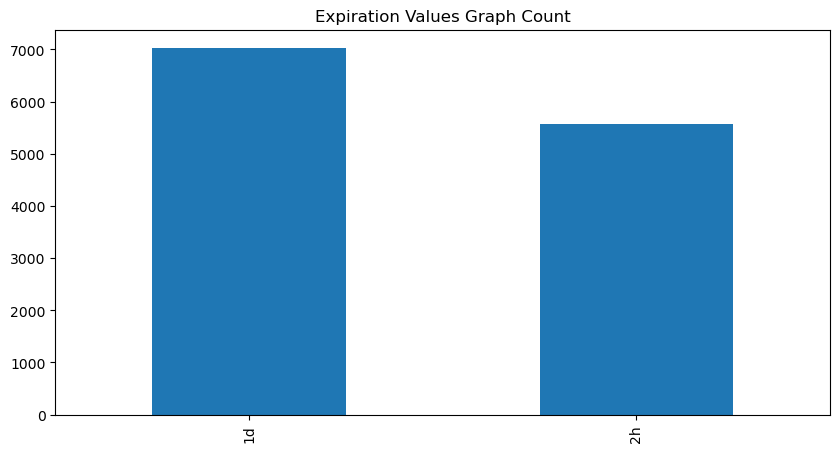

In [22]:
plt.figure(figsize=(10,5))

coupon_df.expiration.value_counts().plot(kind='bar')
plt.title('Expiration Values Graph Count')

Text(0.5, 1.0, 'Expiration Value Counts')

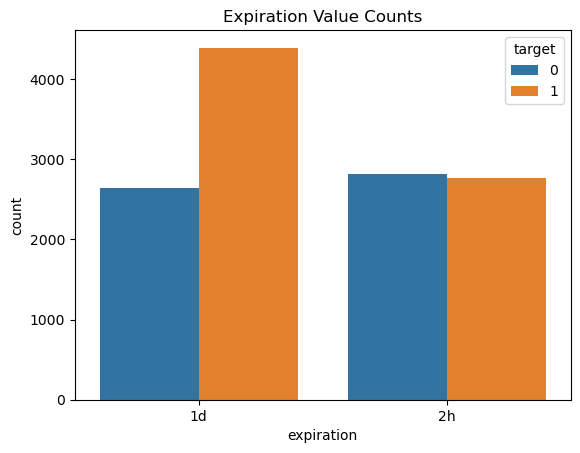

In [23]:
sns.countplot(x='expiration',data=coupon_df,hue='target')
plt.title("Expiration Value Counts")

Text(0.5, 1.0, 'Bar Value Counts')

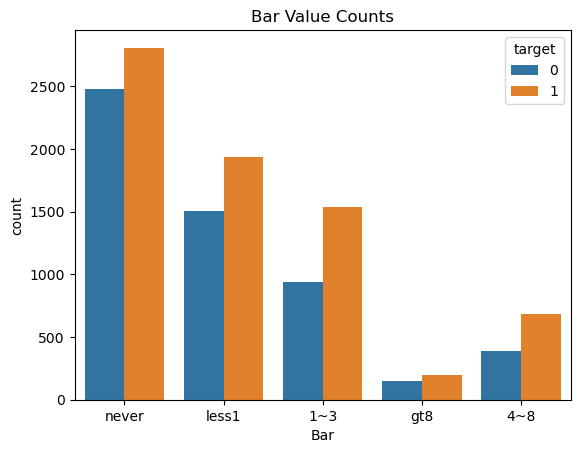

In [24]:
sns.countplot(x='Bar',data=coupon_df,hue='target')
plt.title("Bar Value Counts")

Text(0.5, 1.0, 'CoffeeHouse Value Counts')

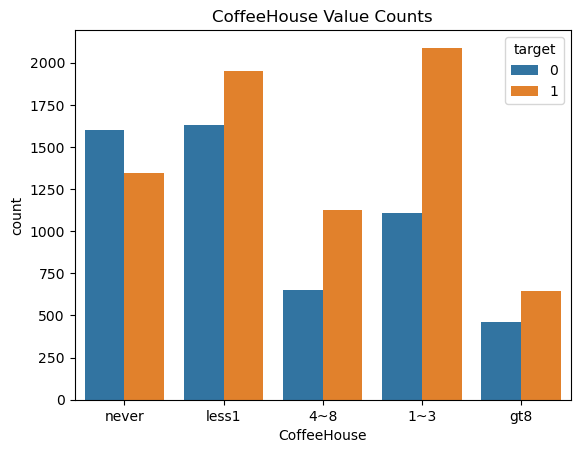

In [25]:
sns.countplot(x='CoffeeHouse',data=coupon_df,hue='target')
plt.title("CoffeeHouse Value Counts")

Text(0.5, 1.0, 'CarryAway Value Counts')

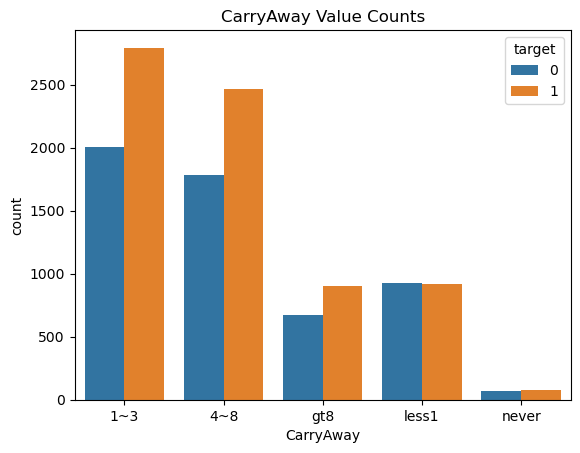

In [26]:
sns.countplot(x='CarryAway',data=coupon_df,hue='target')
plt.title("CarryAway Value Counts")

Text(0.5, 1.0, 'RestaurantLessThan20 Value Counts')

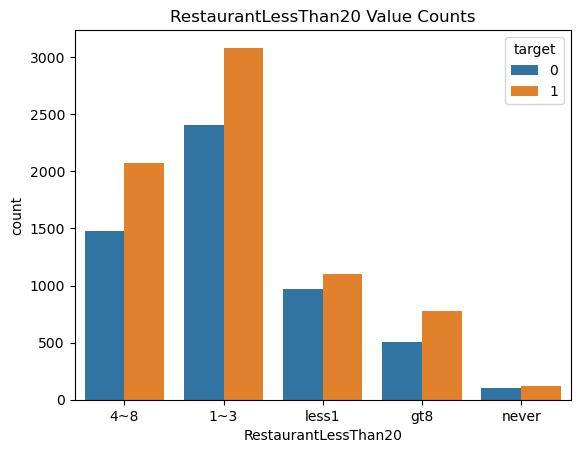

In [27]:
sns.countplot(x='RestaurantLessThan20',data=coupon_df,hue='target')
plt.title("RestaurantLessThan20 Value Counts")

Text(0.5, 1.0, 'Restaurant20To50 Value Counts')

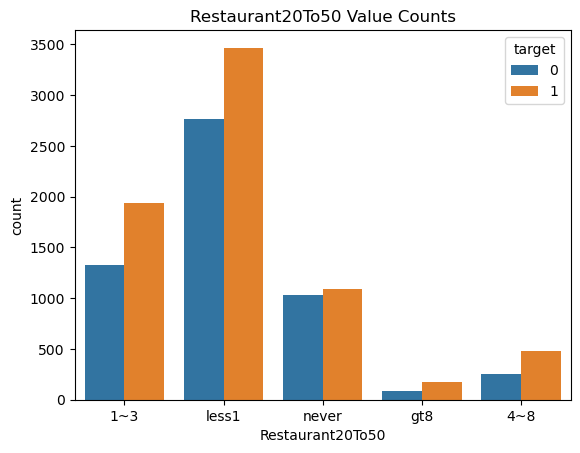

In [28]:
sns.countplot(x='Restaurant20To50',data=coupon_df,hue='target')
plt.title("Restaurant20To50 Value Counts")

In [29]:
target_ans_yes = coupon_df[coupon_df['target']==1] 
target_ans_no = coupon_df[coupon_df['target']==0] 

In [30]:
coupon_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

Text(0.5, 1.0, 'Age Values Graph Count')

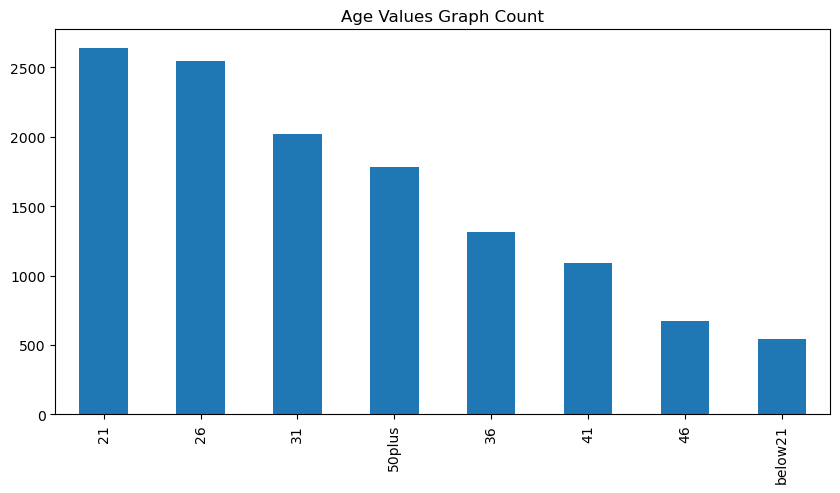

In [31]:
plt.figure(figsize=(10,5))

coupon_df.age.value_counts().plot(kind='bar')
plt.title('Age Values Graph Count')

Text(0.5, 1.0, 'Amount of Coupons used, categorized by Age')

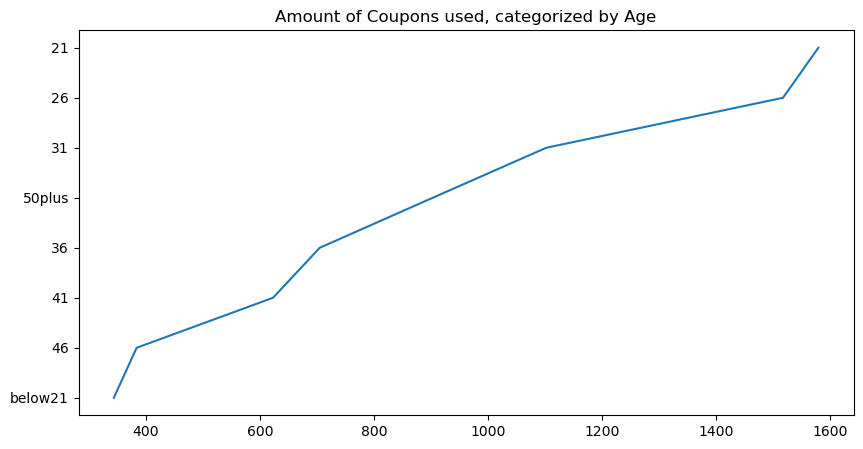

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(y=target_ans_yes['age'].value_counts().to_dict().keys(),x=target_ans_yes['age'].value_counts().to_dict().values())

plt.title('Amount of Coupons used, categorized by Age')

In [33]:
coupon_df['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

Text(0.5, 1.0, 'Education Values Graph Count')

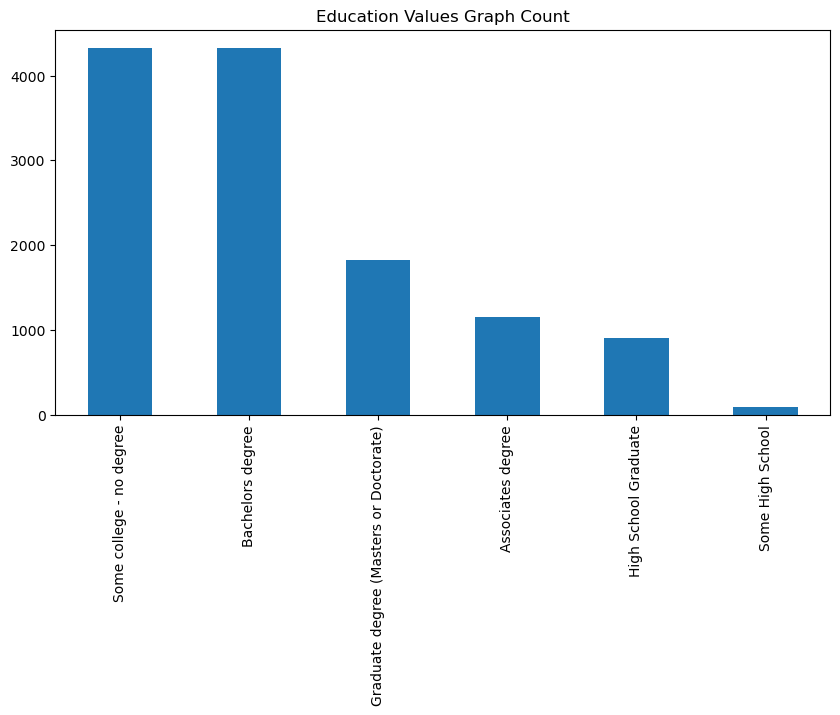

In [34]:
plt.figure(figsize=(10,5))

coupon_df.education.value_counts().plot(kind='bar')
plt.title('Education Values Graph Count')

Text(0.5, 1.0, 'Amount of Coupons used, categorized by Education')

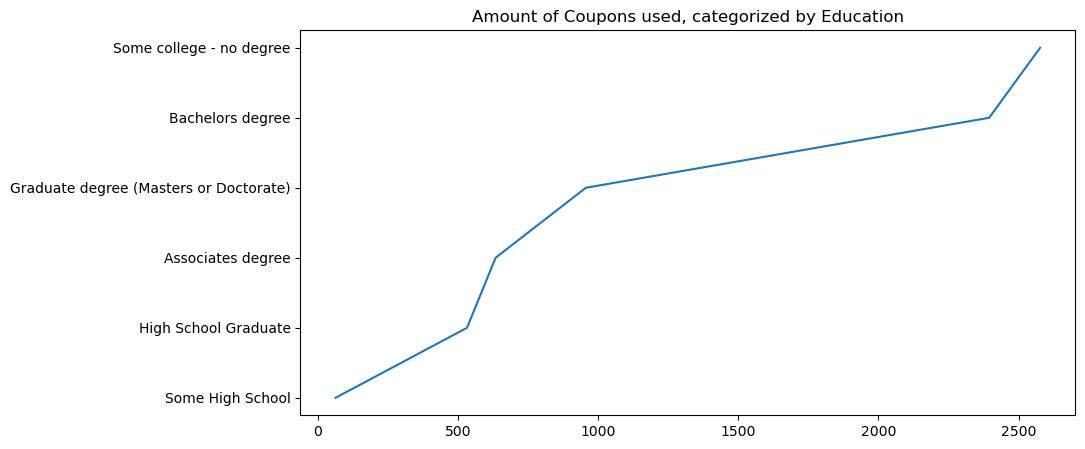

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(y=target_ans_yes['education'].value_counts().to_dict().keys(),x=target_ans_yes['education'].value_counts().to_dict().values())

plt.title('Amount of Coupons used, categorized by Education')

In [36]:
coupon_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Text(0.5, 1.0, 'Gender Values Graph Count')

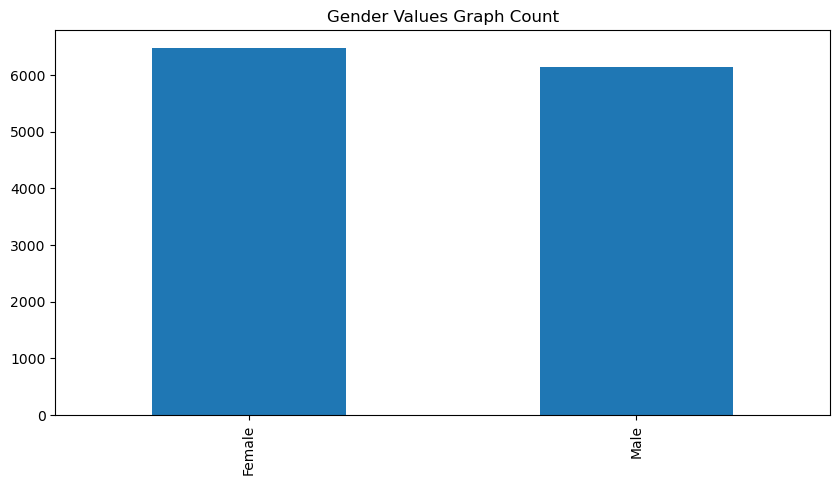

In [37]:
plt.figure(figsize=(10,5))

coupon_df.gender.value_counts().plot(kind='bar')
plt.title('Gender Values Graph Count')

Text(0.5, 1.0, 'Amount of Coupons used, categorized by Gender')

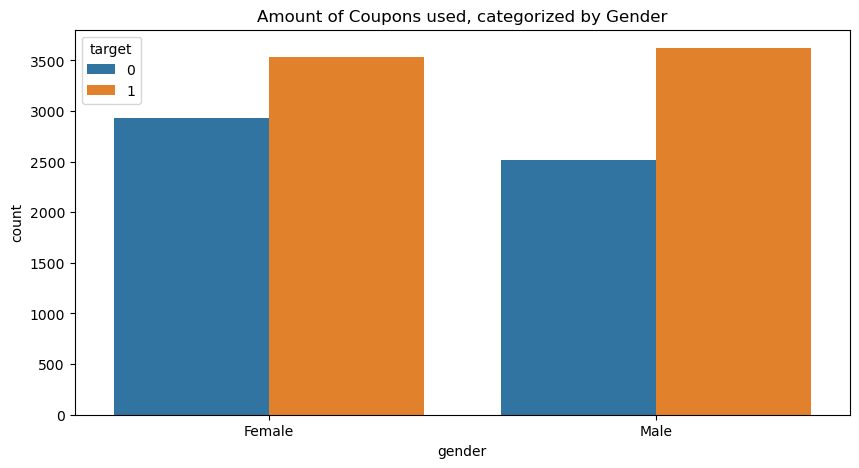

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=coupon_df,hue='target')
plt.title("Amount of Coupons used, categorized by Gender")

In [39]:
coupon_df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

Text(0.5, 1.0, 'Income Values Graph Count')

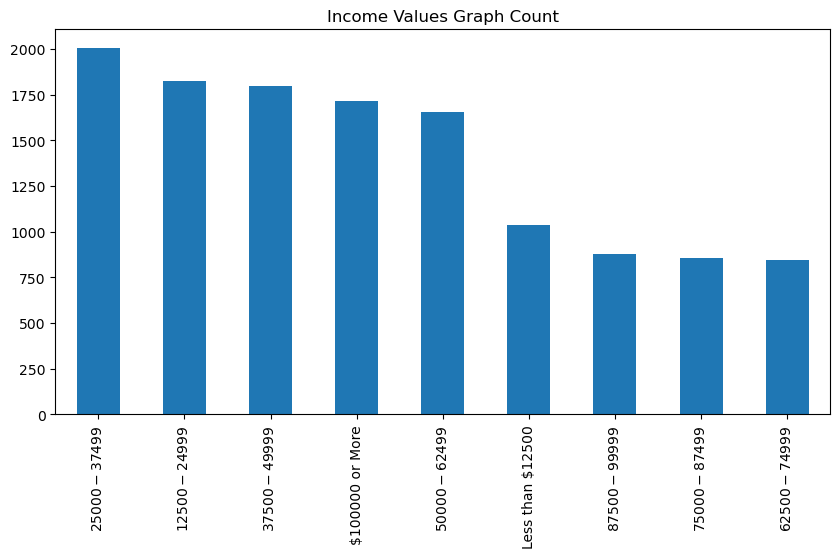

In [40]:
plt.figure(figsize=(10,5))

coupon_df.income.value_counts().plot(kind='bar')
plt.title('Income Values Graph Count')

Text(0.5, 1.0, 'Income Value Counts')

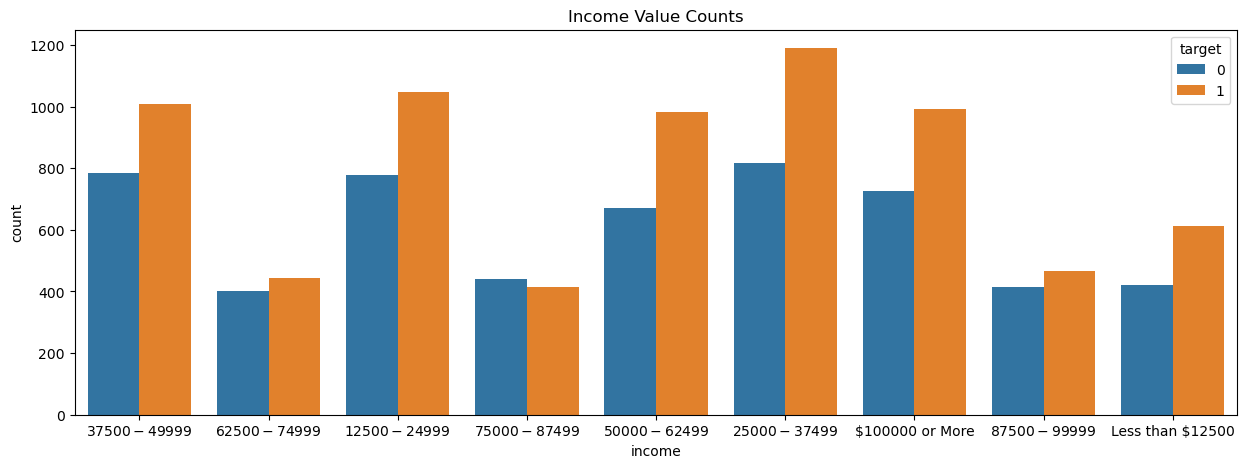

In [41]:
plt.figure(figsize = (15,5))

sns.countplot(x='income',data=coupon_df,hue='target')
plt.title("Income Value Counts")

In [42]:
coupon_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

Text(0.5, 1.0, 'Marital Status Value Counts')

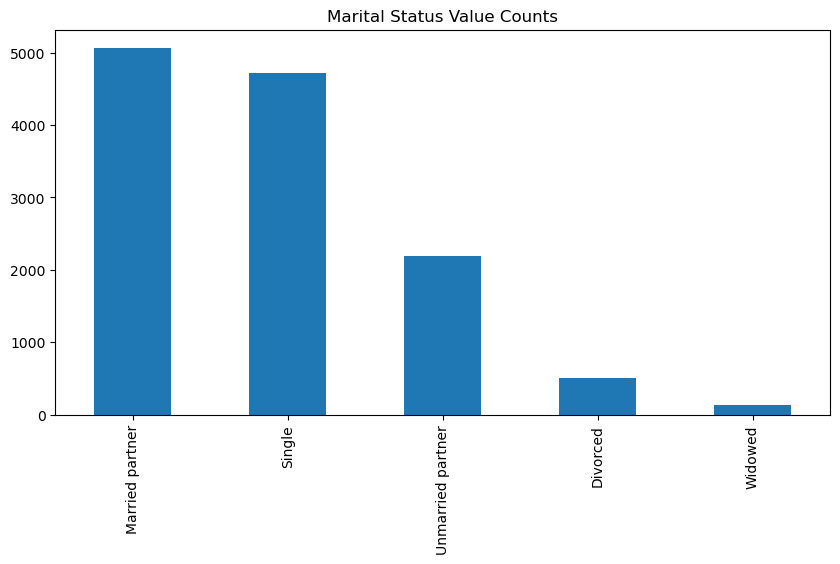

In [43]:
plt.figure(figsize=(10,5))

coupon_df.maritalStatus.value_counts().plot(kind='bar')
plt.title('Marital Status Value Counts')

Text(0.5, 1.0, 'Marital Status Value Counts')

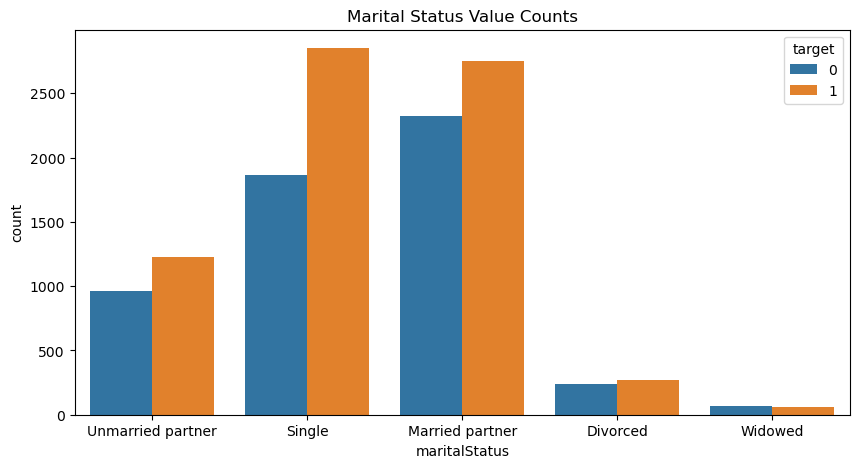

In [44]:
plt.figure(figsize = (10,5))

sns.countplot(x='maritalStatus',data=coupon_df,hue='target')
plt.title("Marital Status Value Counts")

In [45]:
coupon_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Text(0.5, 1.0, 'Occupation Values Graph Count')

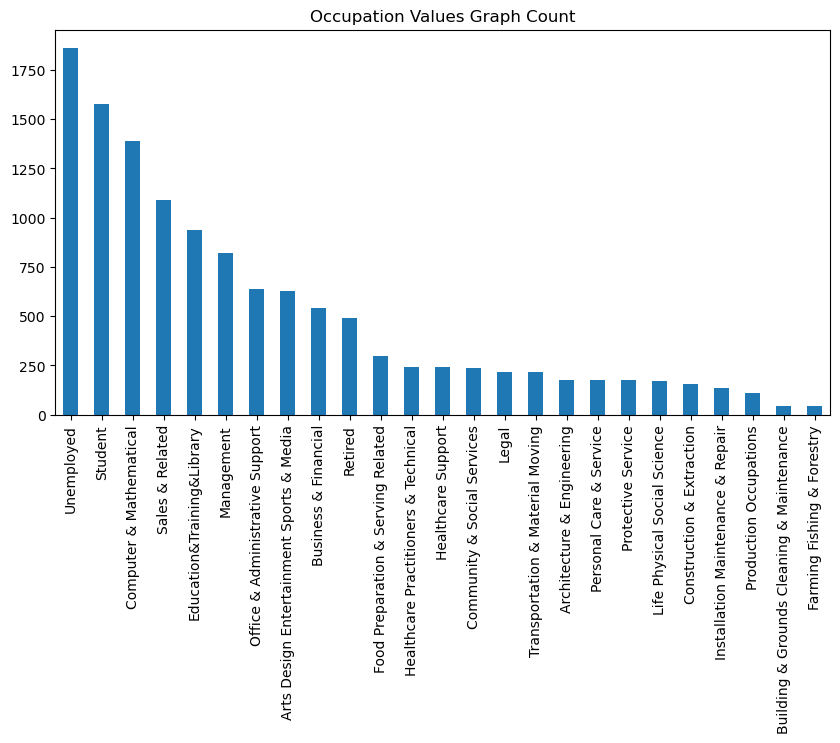

In [46]:
plt.figure(figsize=(10,5))

coupon_df.occupation.value_counts().plot(kind='bar')
plt.title('Occupation Values Graph Count')

Text(0.5, 1.0, 'Amount of Coupons used, categorized by Occupation')

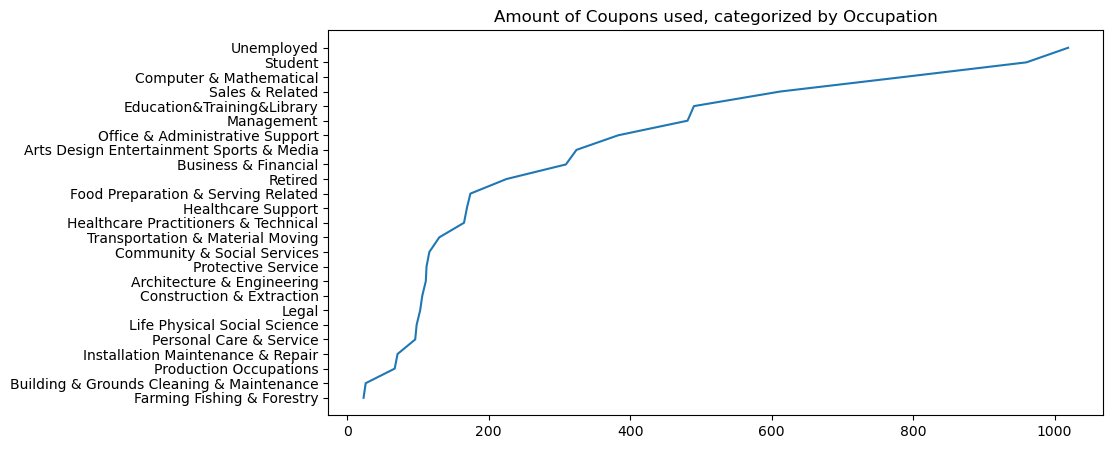

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(y=target_ans_yes['occupation'].value_counts().to_dict().keys(),x=target_ans_yes['occupation'].value_counts().to_dict().values())

plt.title('Amount of Coupons used, categorized by Occupation')

In [48]:
coupon_df['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

Text(0.5, 1.0, 'Passenger Values Graph Count')

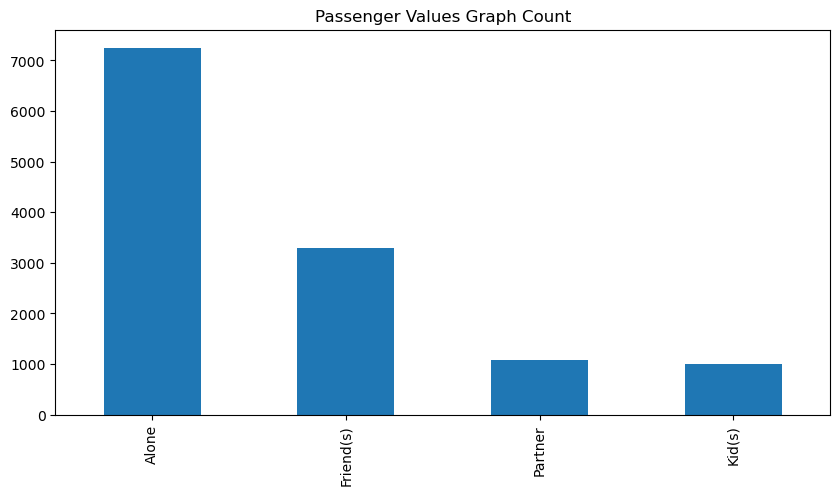

In [49]:
plt.figure(figsize=(10,5))

coupon_df.passanger.value_counts().plot(kind='bar')
plt.title('Passenger Values Graph Count')

Text(0.5, 1.0, 'Passenger Value Counts')

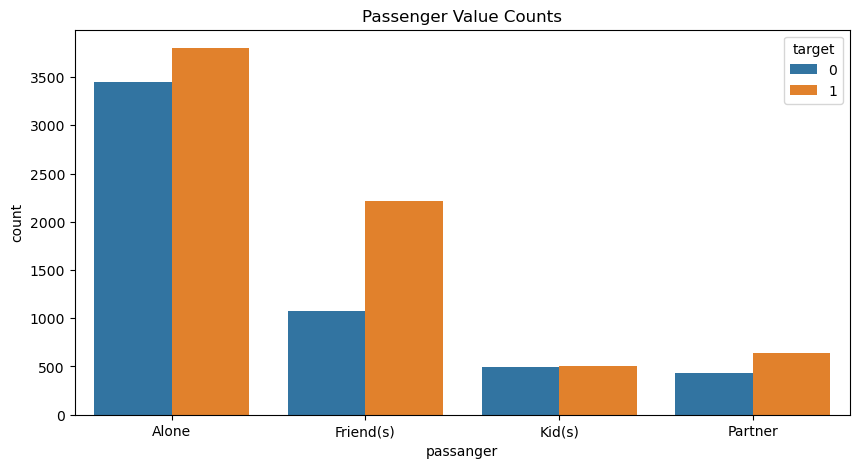

In [50]:
plt.figure(figsize = (10,5))

sns.countplot(x='passanger',data=coupon_df,hue='target')
plt.title("Passenger Value Counts")

In [51]:
coupon_df['has_children'].unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Children Values Graph Count')

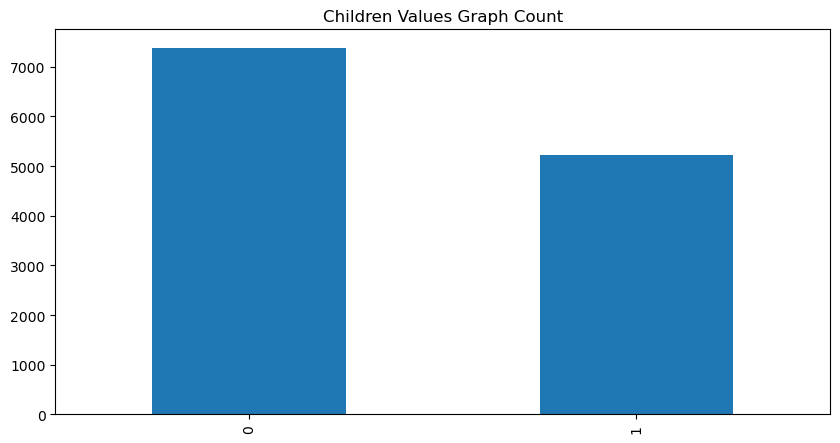

In [52]:
plt.figure(figsize=(10,5))

coupon_df.has_children.value_counts().plot(kind='bar')
plt.title('Children Values Graph Count')

Text(0.5, 1.0, 'Children Values Graph Count')

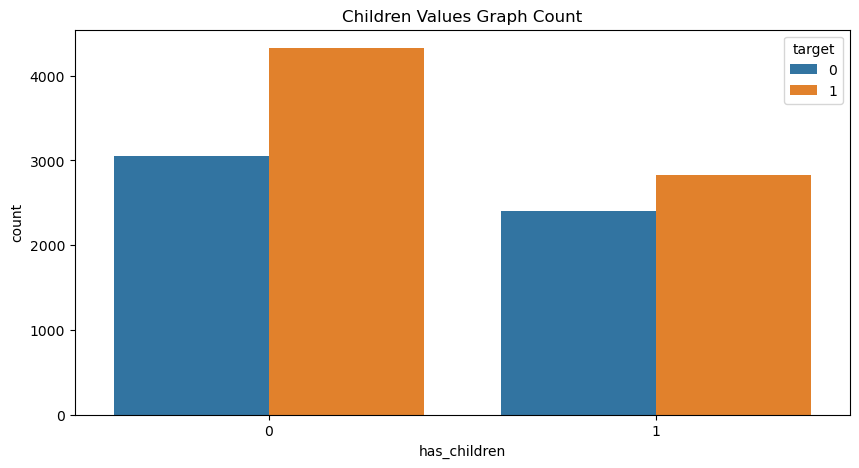

In [53]:
plt.figure(figsize = (10,5))

sns.countplot(x='has_children',data=coupon_df,hue='target')
plt.title("Children Values Graph Count")

In [54]:
coupon_df['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

Text(0.5, 1.0, 'Weather Values Graph Count')

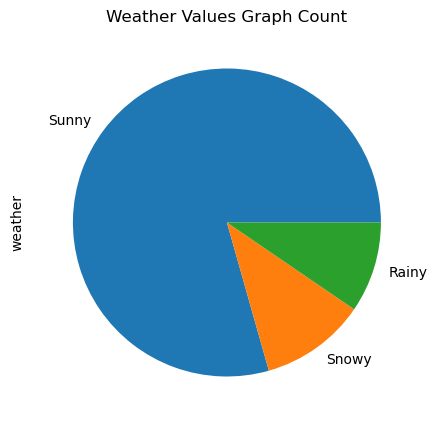

In [55]:
plt.figure(figsize=(10,5))

coupon_df.weather.value_counts().plot(kind='pie')
plt.title('Weather Values Graph Count')

Text(0.5, 1.0, 'Weather Value Counts')

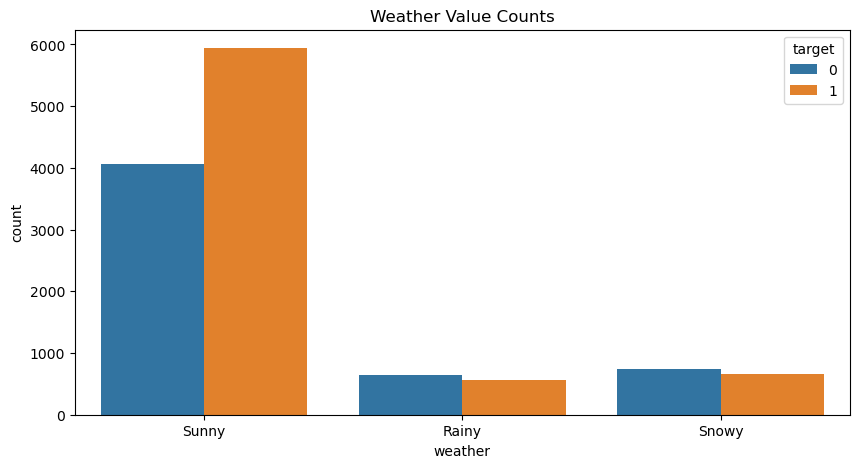

In [56]:
plt.figure(figsize = (10,5))

sns.countplot(x='weather',data=coupon_df,hue='target')
plt.title("Weather Value Counts")

In [57]:
coupon_df['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

Text(0.5, 1.0, 'Time Values Graph Count')

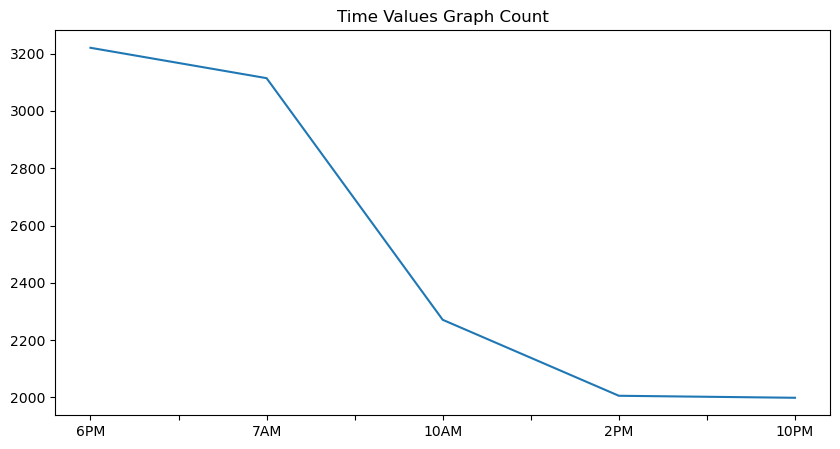

In [58]:
plt.figure(figsize=(10,5))

coupon_df.time.value_counts().plot(kind='line')
plt.title('Time Values Graph Count')

Text(0.5, 1.0, 'Time Values Graph Count')

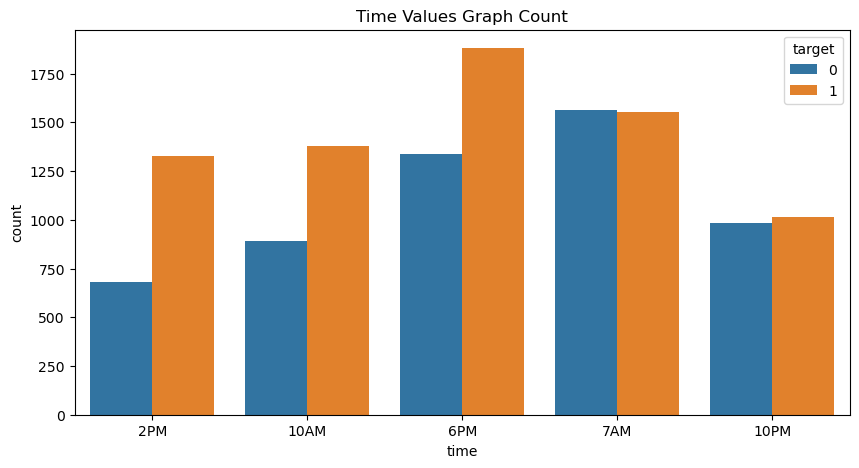

In [59]:
plt.figure(figsize = (10,5))

sns.countplot(x='time',data=coupon_df,hue='target')
plt.title('Time Values Graph Count')

In [60]:
coupon_df['temperature'].unique()

array([55, 80, 30], dtype=int64)

Text(0.5, 1.0, 'Temperature Values Graph Count')

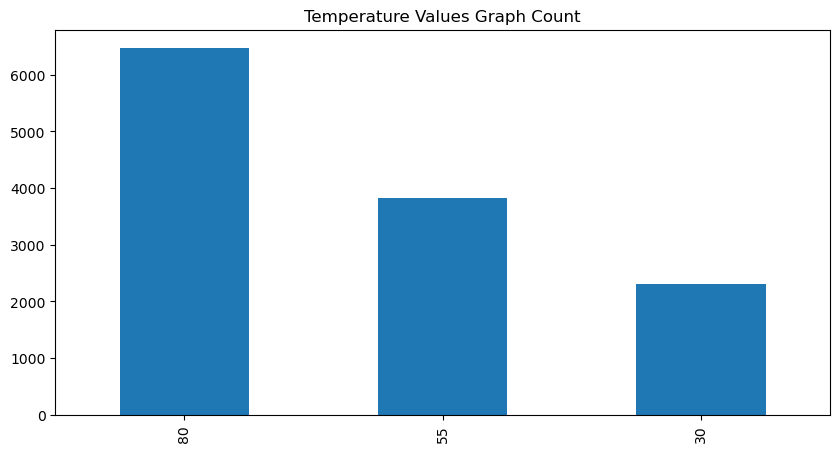

In [61]:
plt.figure(figsize=(10,5))

coupon_df.temperature.value_counts().plot(kind='bar')
plt.title('Temperature Values Graph Count')

Text(0.5, 1.0, 'Temperature Value Counts')

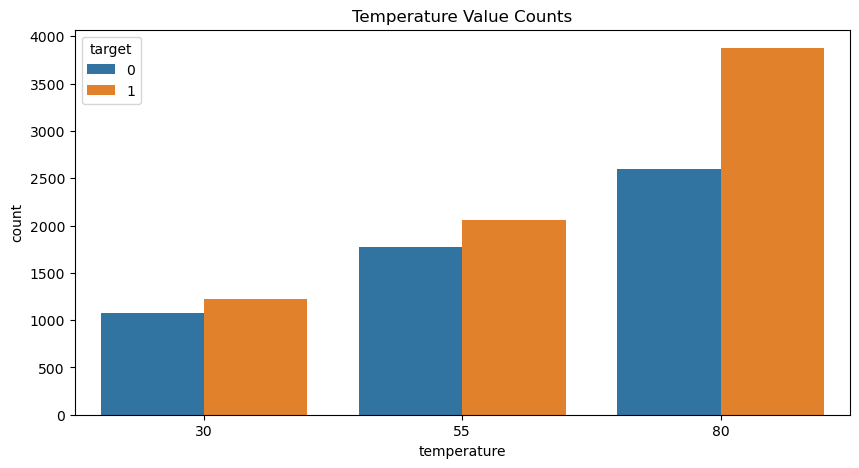

In [62]:
plt.figure(figsize = (10,5))

sns.countplot(x='temperature',data=coupon_df,hue='target')
plt.title("Temperature Value Counts")

In [63]:
coupon_df['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

Text(0.5, 1.0, 'Destination Values Graph Count')

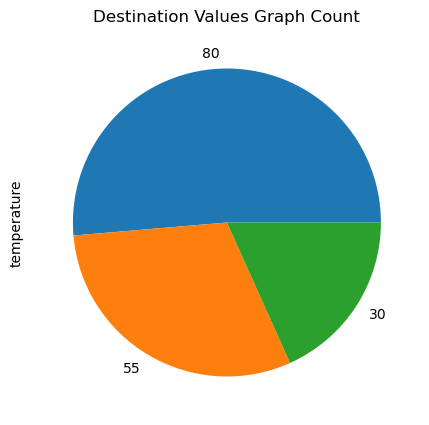

In [64]:
plt.figure(figsize=(10,5))

coupon_df.temperature.value_counts().plot(kind='pie')
plt.title('Destination Values Graph Count')

Text(0.5, 1.0, 'Destination Value Counts')

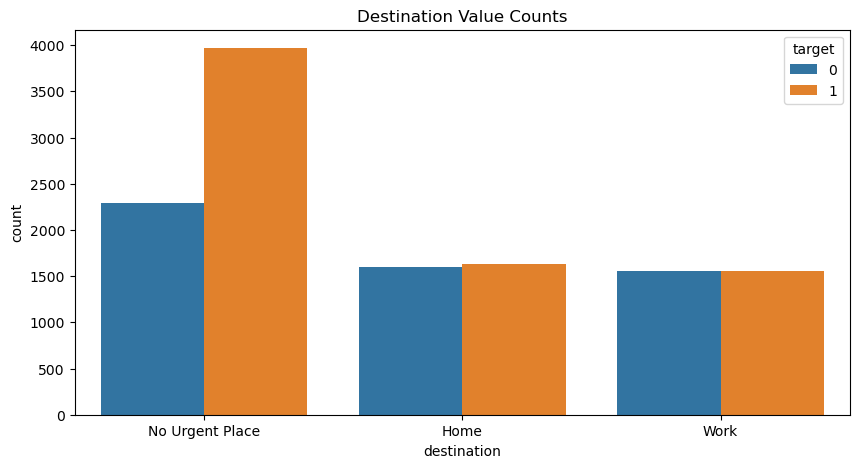

In [65]:
plt.figure(figsize = (10,5))

sns.countplot(x='destination',data=coupon_df,hue='target')
plt.title("Destination Value Counts")

In [66]:
coupon_df['toCoupon_GEQ15min'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'toCoupon_GEQ15min Value Counts')

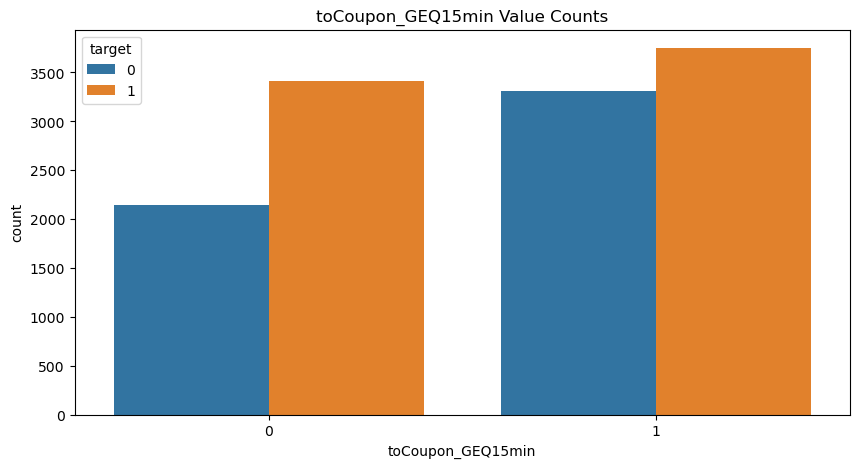

In [67]:
plt.figure(figsize = (10,5))

sns.countplot(x='toCoupon_GEQ15min',data=coupon_df,hue='target')
plt.title("toCoupon_GEQ15min Value Counts")

In [68]:
coupon_df['toCoupon_GEQ25min'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'toCoupon_GEQ25min Counts')

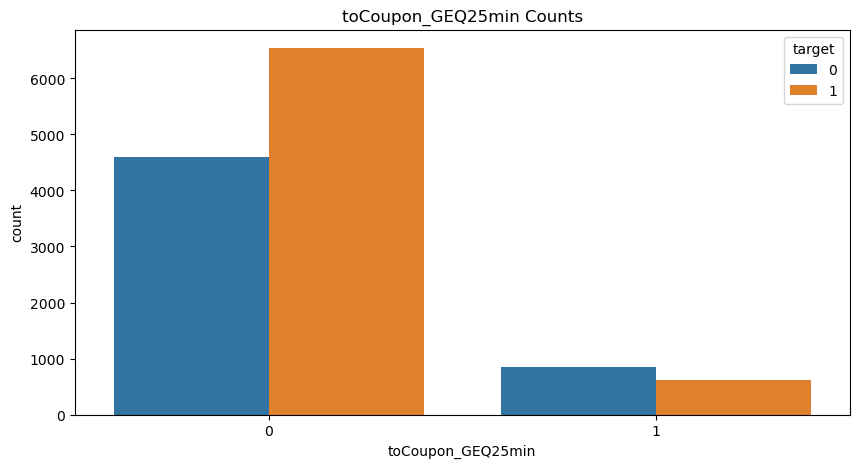

In [69]:
plt.figure(figsize = (10,5))

sns.countplot(x='toCoupon_GEQ25min',data=coupon_df,hue='target')
plt.title("toCoupon_GEQ25min Counts")

In [70]:
coupon_df['direction_same'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'direction_same Counts')

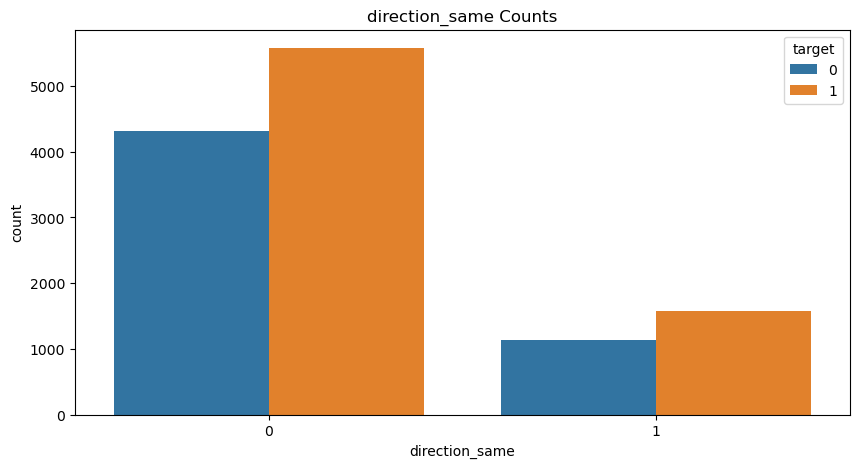

In [71]:
plt.figure(figsize = (10,5))

sns.countplot(x='direction_same',data=coupon_df,hue='target')
plt.title("direction_same Counts")

## Decision Tree Classifier

In [72]:
#Define predictors and target
nrow, ncol = coupon_df.shape
predictors = coupon_df.iloc[:, :ncol-1]
target = coupon_df.iloc[:, -1]
print(predictors)
print(target)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

In [73]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=0)

**Encoding**

In [74]:
#Checking what variables to encode
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

In [75]:
#One-hot encoding
encoder = ce.OneHotEncoder(cols=['destination', 'passanger', 'weather', 'time', 'coupon',
                                  'expiration', 'gender', 'age', 'maritalStatus',
                                  'education', 'occupation'])

#Ordinal encoding for discretised features
encoder_ord = ce.OrdinalEncoder(cols=['income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

X_train = encoder.fit_transform(X_train)
X_train = encoder_ord.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_test = encoder_ord.transform(X_test)

#Transform predictors otherwise cross validation does not work
predictors = encoder.fit_transform(predictors)
predictors = encoder_ord.fit_transform(predictors)

#Checking if encoding is done correctly
print(X_train.info())
print(X_test.info())
print(predictors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 3188 to 2732
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination_1         8827 non-null   int64
 1   destination_2         8827 non-null   int64
 2   destination_3         8827 non-null   int64
 3   passanger_1           8827 non-null   int64
 4   passanger_2           8827 non-null   int64
 5   passanger_3           8827 non-null   int64
 6   passanger_4           8827 non-null   int64
 7   weather_1             8827 non-null   int64
 8   weather_2             8827 non-null   int64
 9   weather_3             8827 non-null   int64
 10  temperature           8827 non-null   int64
 11  time_1                8827 non-null   int64
 12  time_2                8827 non-null   int64
 13  time_3                8827 non-null   int64
 14  time_4                8827 non-null   int64
 15  time_5                8827 non-null   int64
 16  cou

In [76]:
#Build baseline Decision Tree
dt = tree.DecisionTreeClassifier(random_state=0)

#Train DTC
tdt = dt.fit(X_train, y_train)
print('Number of tree nodes: ', tdt.tree_.node_count)

Number of tree nodes:  4711


**Tuning**

max_depth = 1 Average 10-Fold CV Score: 0.5676 Node count: 3
max_depth = 2 Average 10-Fold CV Score: 0.6171 Node count: 7
max_depth = 3 Average 10-Fold CV Score: 0.6482 Node count: 15
max_depth = 4 Average 10-Fold CV Score: 0.6562 Node count: 31
max_depth = 5 Average 10-Fold CV Score: 0.6659 Node count: 61
max_depth = 6 Average 10-Fold CV Score: 0.675 Node count: 115
max_depth = 7 Average 10-Fold CV Score: 0.6803 Node count: 207
max_depth = 8 Average 10-Fold CV Score: 0.6657 Node count: 357
max_depth = 9 Average 10-Fold CV Score: 0.6579 Node count: 579


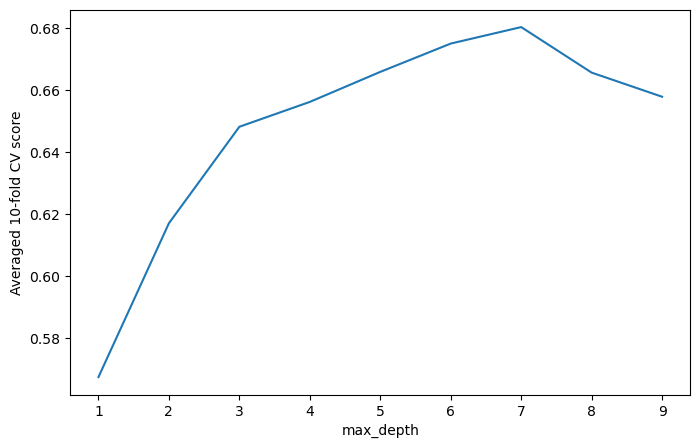

In [77]:
#Tune max_depth parameter
cv = cross_val_score(dt, predictors, target, cv=10) #Use 10-fold cross-validation score

maxdepth_cv = []
node_counts = []

for k in range (1,10,1):
    dt = DecisionTreeClassifier(max_depth=k, random_state=0)
    dt.fit(X_train, y_train)
    predict = dt.predict(X_test)
    cv = cross_val_score(dt, predictors, target, cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth = {}".format(k), "Average 10-Fold CV Score: {}".format(round(np.mean(cv), 4)),
          "Node count: {}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)

#Plot averaged CV scores for all max_depth tunings
fig, axes = plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,10,1))
k=range(1,10,1)
plt.plot(k, maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

In [78]:
#Decision Tree with optimised max_depth = 7
dt = tree.DecisionTreeClassifier(max_depth=7, random_state=0)

#Train DTC
tdt = dt.fit(X_train, y_train)
print('Number of tree nodes:', tdt.tree_.node_count) # Print out the result

Number of tree nodes: 207


max_depth = 7 max_leaf_nodes = 20 Average 10-Fold CV Score: 0.6697 Node count: 39
max_depth = 7 max_leaf_nodes = 21 Average 10-Fold CV Score: 0.6748 Node count: 41
max_depth = 7 max_leaf_nodes = 22 Average 10-Fold CV Score: 0.6794 Node count: 43
max_depth = 7 max_leaf_nodes = 23 Average 10-Fold CV Score: 0.6825 Node count: 45
max_depth = 7 max_leaf_nodes = 24 Average 10-Fold CV Score: 0.6872 Node count: 47
max_depth = 7 max_leaf_nodes = 25 Average 10-Fold CV Score: 0.6852 Node count: 49
max_depth = 7 max_leaf_nodes = 26 Average 10-Fold CV Score: 0.6863 Node count: 51
max_depth = 7 max_leaf_nodes = 27 Average 10-Fold CV Score: 0.6872 Node count: 53
max_depth = 7 max_leaf_nodes = 28 Average 10-Fold CV Score: 0.6856 Node count: 55
max_depth = 7 max_leaf_nodes = 29 Average 10-Fold CV Score: 0.6854 Node count: 57
max_depth = 7 max_leaf_nodes = 30 Average 10-Fold CV Score: 0.6842 Node count: 59
max_depth = 7 max_leaf_nodes = 31 Average 10-Fold CV Score: 0.6842 Node count: 61
max_depth = 7 ma

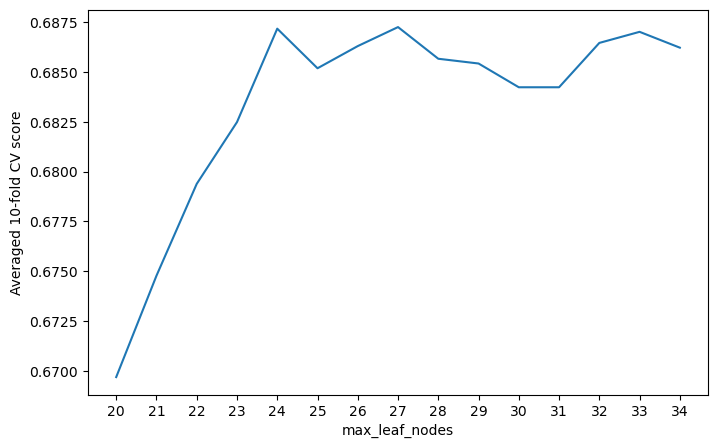

In [79]:
#Tune max_leaf_nodes parameter
cv = cross_val_score(dt, predictors, target, cv=10)

maxleafnodes_cv = []
node_counts = []

for k in range (20,35,1):
    dt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=k, random_state=0)
    dt.fit(X_train, y_train)
    predict = dt.predict(X_test)
    cv = cross_val_score(dt, predictors, target, cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth = 7", "max_leaf_nodes = {}".format(k), "Average 10-Fold CV Score: {}".format(round(np.mean(cv), 4)),
          "Node count: {}".format(nodecount))
    maxleafnodes_cv.append(np.mean(cv))
    node_counts.append(nodecount)

#Plot averaged CV scores for all max_leaf_nodes tunings
fig, axes = plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(20,35,1))
k=range(20,35,1)
plt.plot(k, maxleafnodes_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

In [80]:
#Decision Tree with optimised max_depth=7, max_leaf_nodes=24
dt = tree.DecisionTreeClassifier(max_depth=7, max_leaf_nodes=24, random_state=0)

#Train DTC
tdt = dt.fit(X_train, y_train)
print('Number of tree nodes:', tdt.tree_.node_count) # Print out the result

Number of tree nodes: 47


**Build model**

Number of tree nodes after optimising max leaf nodes: 47


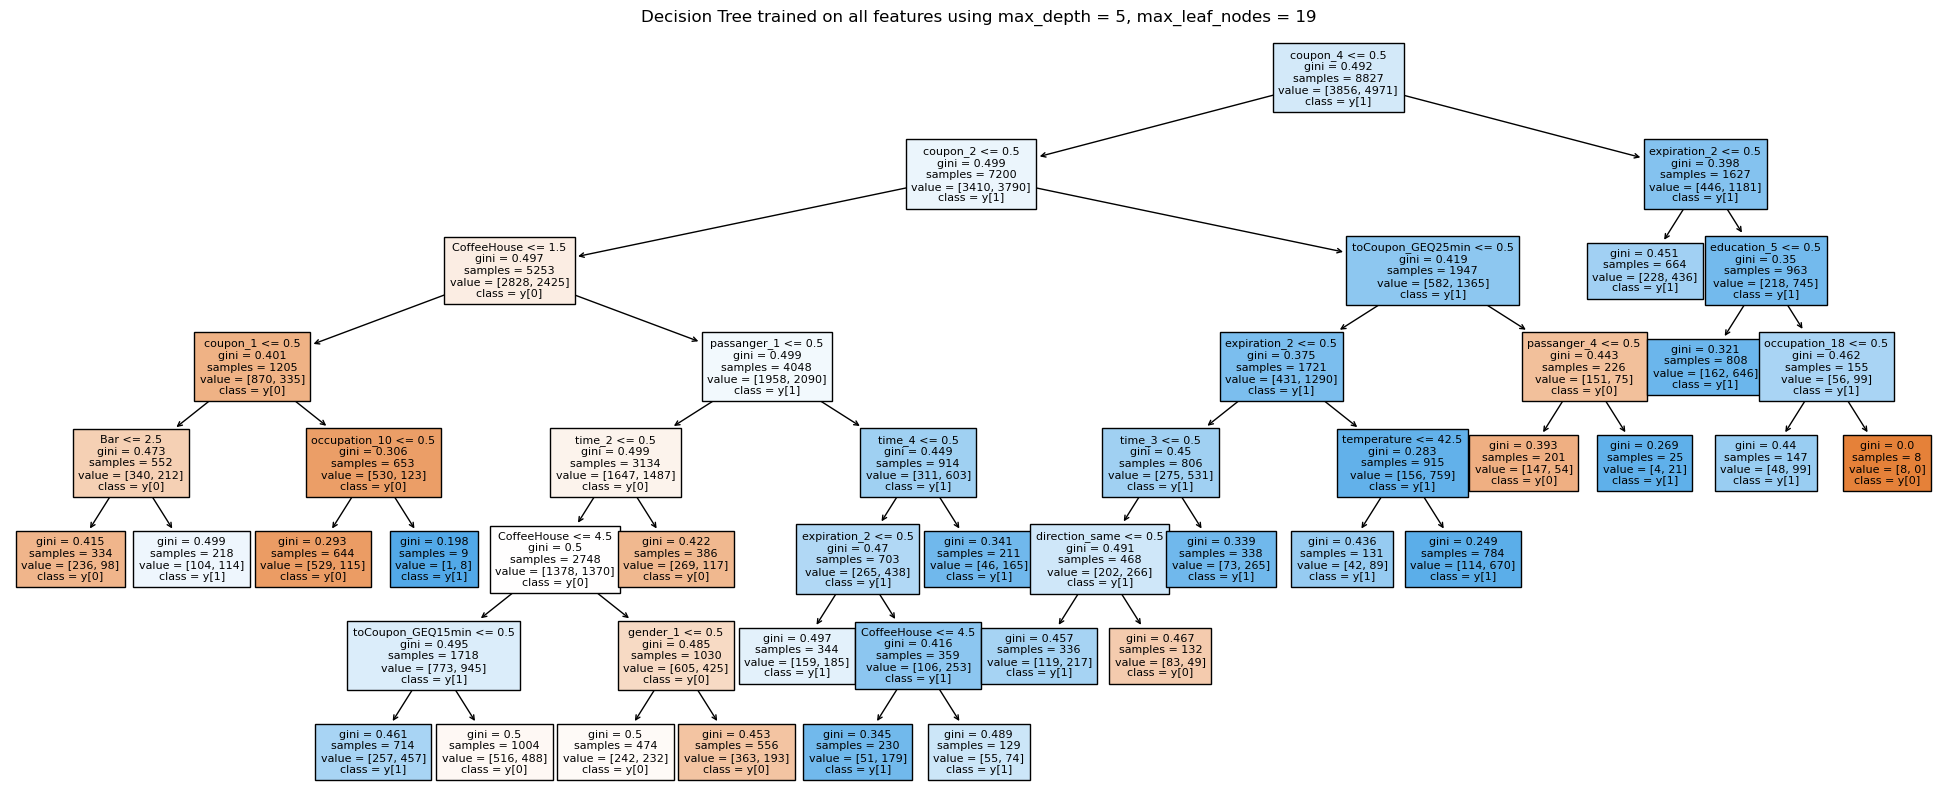

Accuracy score of our model with Decision Tree: 0.68
Precision score of our model with Decision Tree : 0.68
Recall score of our model with Decision Tree : 0.68


In [81]:
#Build final optimised tree
dt_opt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=24, random_state=0)
dt_opt_fit = dt_opt.fit(X_train, y_train)
predict_opt = dt_opt.predict(X_test)
print('Number of tree nodes after optimising max leaf nodes:', dt_opt_fit.tree_.node_count)

plt.figure(figsize=(25,10))
tree.plot_tree(dt_opt, filled=True, class_names=True, feature_names=X_test.columns, fontsize=8)
plt.title("Decision Tree trained on all features using max_depth = 5, max_leaf_nodes = 19")
plt.show()

acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)

**Summaries**

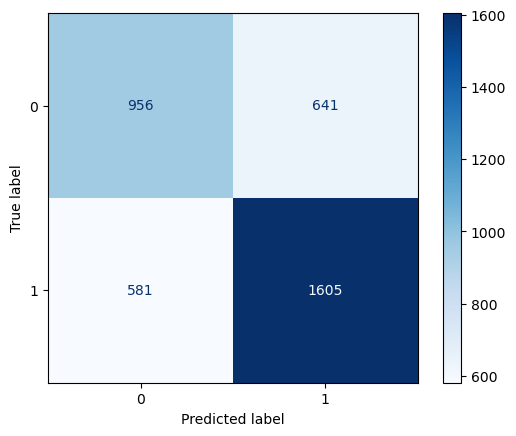

In [82]:
# Confusion Matrix
plot_confusion_matrix(dt_opt, X_test, y_test, cmap=plt.cm.Blues)

In [83]:
# Unique classes in actual test set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1597, 1: 2186}

In [84]:
# Unique classes in prediction
unique, counts = np.unique(predict_opt, return_counts=True)
dict(zip(unique, counts))

{0: 1537, 1: 2246}

In [85]:
# Summary report
print(classification_report(y_test, predict_opt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1597
           1       0.71      0.73      0.72      2186

    accuracy                           0.68      3783
   macro avg       0.67      0.67      0.67      3783
weighted avg       0.68      0.68      0.68      3783



In [86]:
# Feature importance
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(dt_opt.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances.head(25)

,Feature,Importance
17,coupon_2,0.218
72,CoffeeHouse,0.183
19,coupon_4,0.141
77,toCoupon_GEQ25min,0.093
3,passanger_1,0.065
22,expiration_2,0.061
12,time_2,0.035
16,coupon_1,0.031
76,toCoupon_GEQ15min,0.027
13,time_3,0.024


## Chi-Squared Feature Selection

Feature scores using Chi-square:  

Feature 0: 79.606097
Feature 1: 42.024234
Feature 2: 35.562005
Feature 3: 102.686342
Feature 4: 39.992995
Feature 5: 6.888731
Feature 6: 1.541976
Feature 7: 20.754159
Feature 8: 47.260760
Feature 9: 33.793352
Feature 10: 247.830222
Feature 11: 56.722130
Feature 12: 31.596513
Feature 13: 3.734642
Feature 14: 8.530513
Feature 15: 35.562005
Feature 16: 56.713174
Feature 17: 150.545053
Feature 18: 59.844626
Feature 19: 175.105894
Feature 20: 129.968046
Feature 21: 80.940041
Feature 22: 64.986786
Feature 23: 9.758070
Feature 24: 10.212828
Feature 25: 5.612433
Feature 26: 6.953200
Feature 27: 6.252821
Feature 28: 6.665312
Feature 29: 1.856768
Feature 30: 0.004453
Feature 31: 20.398094
Feature 32: 1.073470
Feature 33: 8.314290
Feature 34: 22.782441
Feature 35: 1.469745
Feature 36: 3.248090
Feature 37: 4.678551
Feature 38: 11.163777
Feature 39: 0.770640
Feature 40: 10.192548
Feature 41: 0.206213
Feature 42: 3.773076
Feature 43: 14.500525
Feature 44: 4.684763

<BarContainer object of 79 artists>

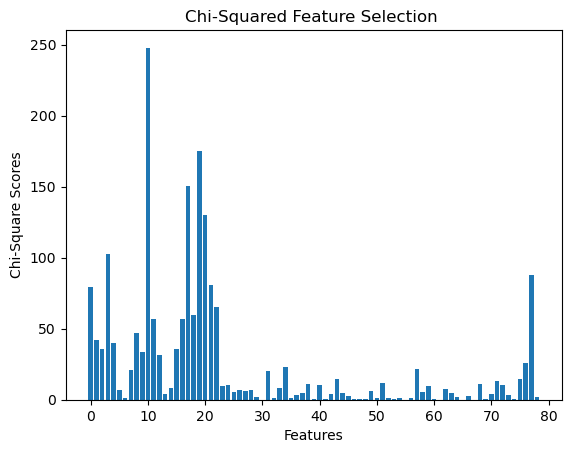

In [87]:
#Using chi-squared test method
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

print('Feature scores using Chi-square: ', '\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

In [88]:
#Display in descending order with feature names
fscores = pd.DataFrame({'Features':X_train.columns, 'Chi-Squared Score':np.round(fs.scores_,3)})
fscores = fscores.sort_values('Chi-Squared Score', ascending=False)
fscores.head(25)

,Features,Chi-Squared Score
10,temperature,247.830
19,coupon_4,175.106
17,coupon_2,150.545
20,coupon_5,129.968
3,passanger_1,102.686
77,toCoupon_GEQ25min,87.532
21,expiration_1,80.940
0,destination_1,79.606
22,expiration_2,64.987
18,coupon_3,59.845


In [89]:
#Display sum of some features with names, descending order
fscores_sum = pd.DataFrame({'Features':['temperature' ,'coupon', 'passanger', 'toCoupon_GEQ25min', 'expiration',
                                        'destination', 'time', 'weather', 'toCoupon_GEQ15min', 'maritalStatus',
                                        'occupation', 'age', 'Restaurant20To50'], 
                            'Chi-Squared Score':[247.830, 572.177, 142.679, 87.532, 145.927, 157.192, 123.881, 101.808,
                                                 25.937, 22.782, 21.595, 20.398, 14.684]})

fscores_sum = fscores_sum.sort_values('Chi-Squared Score', ascending=False)
fscores_sum.head(10)

,Features,Chi-Squared Score
1,coupon,572.177
0,temperature,247.830
5,destination,157.192
4,expiration,145.927
2,passanger,142.679
6,time,123.881
7,weather,101.808
3,toCoupon_GEQ25min,87.532
8,toCoupon_GEQ15min,25.937
9,maritalStatus,22.782


## Artificial Neural Network

In [90]:
#Determining best number of iteration with highest accuracy
mlp = MLPClassifier(hidden_layer_sizes=25, max_iter=200, early_stopping=True, random_state=0)
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_scores = mlp.validation_scores_

In [91]:
max_iter_values = list(range(1,101))
mlp_scores = pd.DataFrame({'max_iter values':max_iter_values, 'Accuracy Score':mlp.validation_scores_})
mlp_scores

,max_iter values,Accuracy Score
0,1,0.437146
1,2,0.527746
2,3,0.534541
3,4,0.550396
4,5,0.583239
...,...,...
95,96,0.687429
96,97,0.691959
97,98,0.686297
98,99,0.697622


In [92]:
#Sorting values in descending order to find best max_iter value
mlp_scores_ordered = mlp_scores.sort_values('Accuracy Score', ascending=False)
mlp_scores_ordered.head(10)

,max_iter values,Accuracy Score
88,89,0.698754
98,99,0.697622
94,95,0.697622
90,91,0.696489
84,85,0.695357
77,78,0.695357
86,87,0.694224
80,81,0.691959
96,97,0.691959
81,82,0.691959


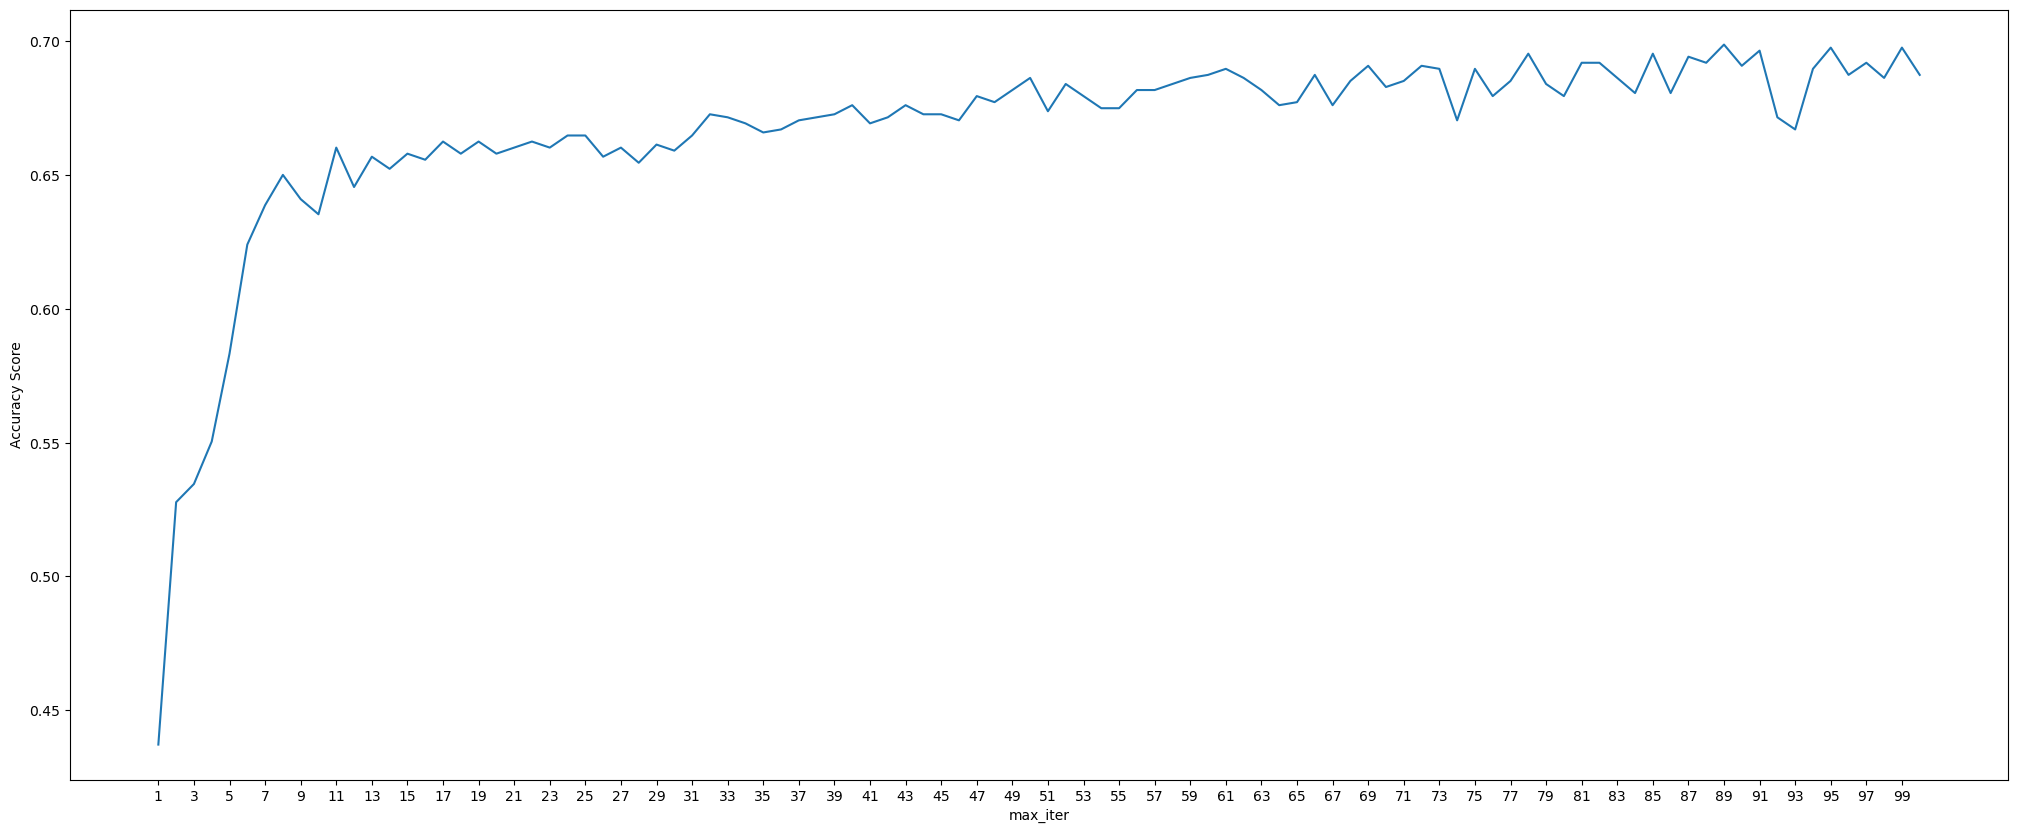

In [93]:
#Plotting accuracy score per iteration
fig, axes = plt.subplots(1,1,figsize=(25,10))
axes.set_xticks(range(1,101,2))
k = range(1,101)
plt.plot(k, mlp_scores['Accuracy Score'])
plt.xlabel("max_iter")
plt.ylabel("Accuracy Score")
plt.show()

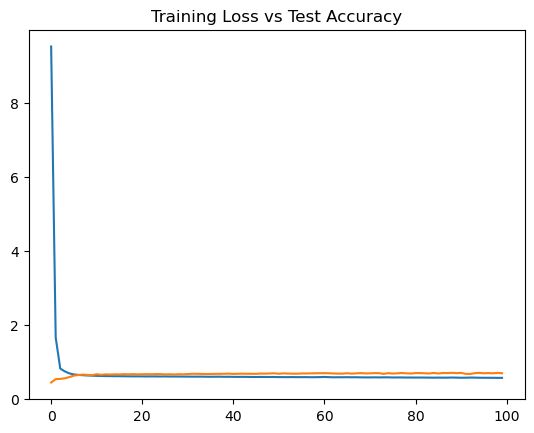

In [135]:
#Plotting loss values against test accuracy
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.plot(mlp.validation_scores_)
plt.title("Training Loss vs Test Accuracy")
plt.show()

In [95]:
#Experimenting with 2 hidden layers, 1st layer decrease, 2nd layer increases - step of one
mlp_opt_scores = [] 

for i in range(1,25):
    mlp_opt = MLPClassifier(hidden_layer_sizes=(25-i, i), max_iter=89, random_state=0)
    mlp_opt.fit(X_train, y_train)
    mlp_predict = mlp_opt.predict(X_test)
    scores = mlp_opt.score(X_test, y_test)
    mlp_opt_scores.append(scores)

In [96]:
#Tabulate neuron set and accuracy score
neurons_count = ['24, 1', '23, 2', '22, 3', '21, 4', '20, 5', 
                 '19, 6', '18, 7', '17, 8', '16, 9', '15, 10',
                 '14, 11', '13, 12', '12, 13', '11, 14', 
                 '10, 15', '9, 16', '8, 17', '7, 18', '6, 19',
                 '5, 20', '4, 21', '3, 22', '2, 23', '1, 24']

mlp_opt_df = pd.DataFrame({'Neurons [k-1, k]':neurons_count, 'Accuracy Score':mlp_opt_scores})
mlp_opt_df.head(25)

,"Neurons [k-1, k]",Accuracy Score
0,"24, 1",0.577848
1,"23, 2",0.704996
2,"22, 3",0.687814
3,"21, 4",0.690986
4,"20, 5",0.681205
5,"19, 6",0.702088
6,"18, 7",0.693101
7,"17, 8",0.693101
8,"16, 9",0.687814
9,"15, 10",0.696537


In [97]:
#Passing in best parameters
mlp_opt_final = MLPClassifier(hidden_layer_sizes=(13, 12), max_iter=89, random_state=0)
mlp_opt_final.fit(X_train, y_train)
mlp_predict_final = mlp_opt_final.predict(X_test)

In [98]:
#Print accuracy and classification report
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict_final) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict_final))
print('MLP Training set score: {:.2f}%'.format(mlp_opt_final.score(X_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp_opt_final.score(X_test, y_test) * 100))

MLP Accuracy: 71.93%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.71      0.56      0.63      1597
           1       0.72      0.84      0.78      2186

    accuracy                           0.72      3783
   macro avg       0.72      0.70      0.70      3783
weighted avg       0.72      0.72      0.71      3783

MLP Training set score: 73.28%
MLP Testing set score: 71.93%


In [127]:
#Predict using final model
mlp_opt_final.fit(X_train, y_train)
predict_cm = mlp_opt_final.predict(X_test)

predicted_targets = predict_cm
actual_targets = y_test

<AxesSubplot:>

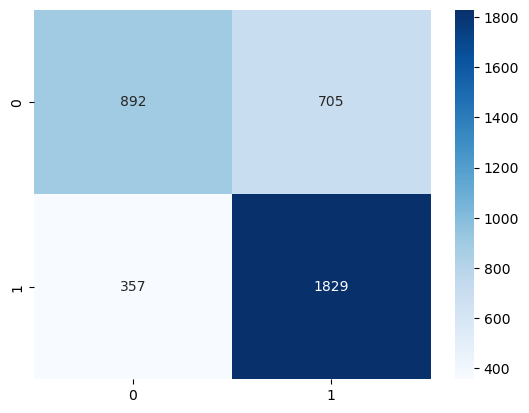

In [128]:
#Show confusion matrix for model prediction
sns.heatmap(confusion_matrix(actual_targets, predicted_targets), annot=True, fmt="d", cmap=plt.cm.Blues)